<a href="https://colab.research.google.com/github/ajipurnama25/cbir-flask2/blob/main/cbir_flask_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/cbir/tugbes"

In [3]:
%cd /content/drive/MyDrive/cbir/tugbes

/content/drive/MyDrive/cbir/tugbes


In [10]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

rice-leaf-diseases.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip \*.zip &> /dev/null && rm *.zip

In [4]:
!ls

kaggle.json  rice_leaf_diseases  rice-leaf-diseases.zip  test  train  val


In [5]:
!ls rice_leaf_diseases

'Bacterial leaf blight'  'Brown spot'  'Leaf smut'


In [ ]:
import os

dataset = "/content/drive/MyDrive/cbir/dataset"
os.mkdir(dataset)

In [ ]:
!mv "/content/drive/MyDrive/cbir/tugbes/rice_leaf_diseases/Bacterial leaf blight" "/content/drive/MyDrive/cbir/dataset"
!mv "/content/drive/MyDrive/cbir/tugbes/rice_leaf_diseases/Brown spot" "/content/drive/MyDrive/cbir/dataset"
!mv "/content/drive/MyDrive/cbir/tugbes/rice_leaf_diseases/Leaf smut" "/content/drive/MyDrive/cbir/dataset"

In [5]:
!ls /content/drive/MyDrive/cbir/dataset

'Bacterial leaf blight'  'Brown spot'  'Leaf smut'


In [15]:
!pip install split-folders

In [6]:
base_dir="/content/drive/MyDrive/cbir/tugbes"
data_dir="/content/drive/MyDrive/cbir/dataset"

In [17]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.8,.1,.1),group_prefix=None)

Copying files: 120 files [00:52,  2.29 files/s]


In [6]:
!ls /content/drive/MyDrive/cbir/tugbes

kaggle.json  rice_leaf_diseases  rice-leaf-diseases.zip  test  train  val


In [7]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = os.path.join(base_dir,'train')
test_path  = os.path.join(base_dir,'test')
val_path   = os.path.join(base_dir,'val')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
Batch_size=32
augmen_gen = ImageDataGenerator(rescale=1. / 255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb'
)

val_gen = augmen_gen.flow_from_directory(
    val_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb'
)

test_gen = augmen_gen.flow_from_directory(
    test_path,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb',
)

Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


IsADirectoryError: ignored

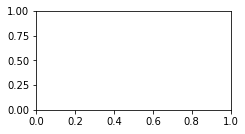

In [10]:
# 1.4 Menampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2 
ncols = 4 

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

pic_index += 4
next_trainh_pix = [os.path.join(train_path, fname) 
  for fname in os.listdir(train_path)[pic_index-4:pic_index]]
next_testh_pix = [os.path.join(test_path, fname) 
  for fname in os.listdir(test_path)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_trainh_pix+next_testh_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('ON') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img) 
  plt.title(img_path.split(os.path.sep)[-2]) 

plt.show()

MODEL

In [11]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D

In [12]:
# TULIS KODE ANDA DISINI

# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.2))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [13]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                        

In [15]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
H = model.fit(train_gen, batch_size=32, epochs=50, validation_data=val_gen)

Epoch 1/50


InvalidArgumentError: ignored